# Hypothesis Testing

In [42]:
import pandas as pd

## Step 2: Load the Dataset

Next, we load the dataset, which contains data relevant to the hypothesis testing and machine learning tasks we will perform. We can inspect the first few rows of the dataset to understand its structure.


In [43]:
df = pd.read_csv('D:\HypothesisTesting\pythonProject\OnlineRetail.csv')

In [44]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


## Step 3: Data Preparation


In [45]:
# Calculating sales volume
df['SalesVolume'] = df['Quantity'] * df['UnitPrice']

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)

# Extract month
df['Month'] = df['InvoiceDate'].dt.month

In [46]:
# Filter for summer (June, July, August) and winter (December, January, February) months
df_filtered = df[df['Month'].isin([6, 7, 8, 12, 1, 2])].copy()  # Use .copy() to avoid the warning

# Label the two groups: 'Winter' for December-February, 'Summer' for June-August
df_filtered.loc[df_filtered['Month'].isin([12, 1, 2]), 'Season'] = 'Winter'
df_filtered.loc[df_filtered['Month'].isin([6, 7, 8]), 'Season'] = 'Summer'

In [47]:
# Group by Season and sum SalesVolume
sales_by_season = df_filtered.groupby('Season')['SalesVolume'].sum()
print(sales_by_season)


Season
Summer    2055103.741
Winter    2240687.940
Name: SalesVolume, dtype: float64


In [48]:
# Separate the two groups
winter_sales = df_filtered[df_filtered['Season'] == 'Winter']['SalesVolume']
summer_sales = df_filtered[df_filtered['Season'] == 'Summer']['SalesVolume']


## Step 4: Hypothesis Testing

We will now perform a hypothesis test to determine if there is a significant difference between two groups in the dataset. Specifically, we will conduct T-test to compare the means of two independent samples.


In [49]:
# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(winter_sales, summer_sales, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: -0.6034488885884063, P-Value: 0.5462110095831658


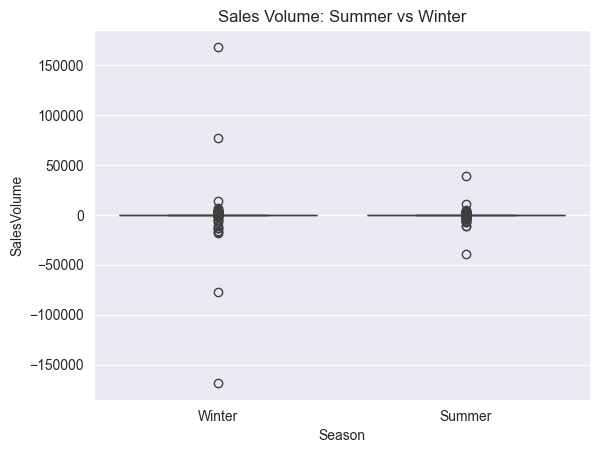

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to compare sales volume distributions
sns.boxplot(x='Season', y='SalesVolume', data=df_filtered)
plt.title('Sales Volume: Summer vs Winter')
plt.show()